In [42]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
class socialMan():
    def __init__(self, ID, X, y, max_w, w_shape):
        self.ID, self.X, self.y, self.max_w = ID, X, y, max_w
        self.W = self.max_w * np.random.rand(*(w_shape))
    
    def immitate(self, other): # immitate betters
        if other.performance() > self.performance():
            row = np.random.randint(other.W.shape[0])
            self.W[row,:] = other.W[row,:]
        if np.random.rand() < 0.1: # Go on your own
            row = np.random.randint(self.W.shape[0])
            self.W[row,:] = self.max_w * np.random.rand(self.W.shape[1])
    
    def performance(self):
        return 1/(1+np.sum(np.power(self.y - self.W.T.dot(self.X),2)))
    
class socialWorld():
    def __init__(self, X, y, N = 20, time = 10000, max_w = 20, w_shape = (2,1)):
        self.X, self.y, self.N, self.time = X, y, N, time
        self.socialMen = [socialMan(i, X=X, y=y, max_w = max_w, w_shape = w_shape) 
                          for i in range(self.N)]
        
    def best(self):
        score, who = self.socialMen[0].performance(), 0
        for i in range(self.N):
            if self.socialMen[i].performance() > score:
                score, who = self.socialMen[i].performance(), i
        return self.socialMen[who].W
    
    def predict(self, X):
        return self.best().T.dot(X)
    
    def runTheWorld(self):
        for i in range(self.time):
            pair = np.random.randint(self.N, size = 2)
            A, B = pair[0], pair[1]
            self.socialMen[A].immitate(self.socialMen[B])
        return self.best() 

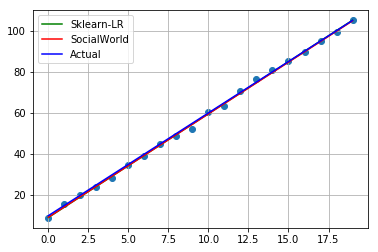

In [50]:
# Generate Data From Correct (Hidden) Function with Noise
correctW, M = np.array([[10],[5]]), 20 # M observations
X = np.array([np.ones(M),np.arange(M)])
y = correctW.T.dot(X) + np.random.randn(X.shape[1])
# Linear Regression from Scikit-Learn
from sklearn.linear_model import LinearRegression
X_train = np.arange(M).reshape(M,1)
lr = LinearRegression()
lr.fit(X_train, y.T)
y_pred = lr.predict(X_train)  
# Social World Optimization
world = socialWorld(X=X, y=y)
world.runTheWorld()
# Plot Results
plt.scatter(X_train, y ); #Points are observations
plt.plot(X_train, y_pred, 'g')
plt.plot(X_train, world.predict(X).T, 'r')
plt.plot(X_train, correctW.T.dot(X).T, 'b')
plt.grid()
plt.legend(("Sklearn-LR", "SocialWorld", "Actual"))

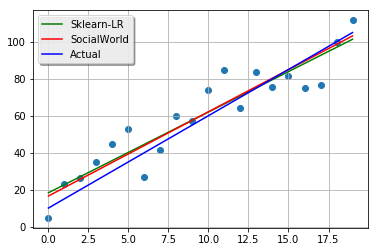

In [48]:
X_train

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])